# Exercise 2.2

In [33]:
import pandas as pd
# Reference to extract the columns: http://greenteapress.com/thinkstats/survey.py
pregnancies = pd.read_fwf("2002FemPreg.dat", 
                         names=["caseid", "nbrnaliv", "babysex", "birthwgt_lb",
                               "birthwgt_oz", "prglength", "outcome", "birthord",
                               "agepreg", "finalwgt"],
                         colspecs=[(0, 12), (21, 22), (55, 56), (57, 58), (57, 59),
                                (274, 276), (276, 277), (278, 279), (283, 285), (422, 439)])

In [34]:
live_briths = pregnancies[pregnancies['outcome'] == 1]
first_baby = live_briths[live_briths['birthord'] == 1]
more_than_one_baby = live_briths[live_briths['birthord'] != 1]
std_first_baby = first_baby['prglength'].std()
std_more_than_one_baby = more_than_one_baby['prglength'].std()

In [35]:
print('SD of prenancy length of first baby [live birth]  ' + str(std_first_baby) + ' weeks')
print('SD of prenancy length of more than one baby [live birth]  ' + str(std_more_than_one_baby) + ' weeks')
print('Difference in SD of pregnancy length between first and more than babies ' + str(std_first_baby - std_more_than_one_baby) + ' weeks')

SD of prenancy length of first baby [live birth]  2.7919014146686947 weeks
SD of prenancy length of more than one baby [live birth]  2.615852350439255 weeks
Difference in SD of pregnancy length between first and more than babies 0.1760490642294399 weeks


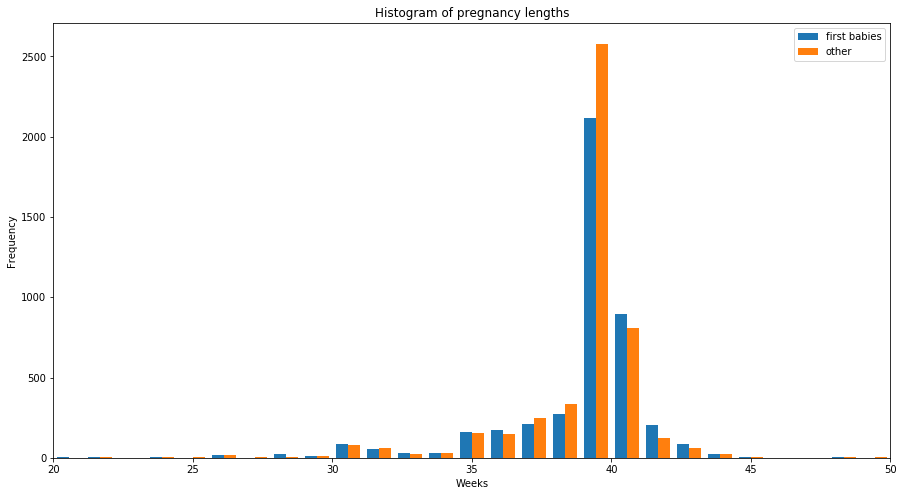

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(15, 8))
plt.hist([first_baby['prglength'], more_than_one_baby['prglength']],label=['first babies', 'other'],bins = 45)
plt.xlabel('Weeks')
plt.ylabel('Frequency')
plt.xlim(20,50)
plt.title('Histogram of pregnancy lengths')
plt.legend()
plt.show()



In [37]:
live_briths.nsmallest(10, 'prglength')

,caseid,nbrnaliv,babysex,birthwgt_lb,birthwgt_oz,prglength,outcome,birthord,agepreg,finalwgt
6458,5849,1.0,2.0,8.0,8.0,0,1,1.0,22.0,3557.187175
4108,3664,1.0,2.0,7.0,7.0,4,1,2.0,21.0,7039.049913
138,150,1.0,2.0,6.0,6.0,9,1,6.0,23.0,6416.070865
11887,10951,4.0,1.0,9.0,9.0,13,1,3.0,38.0,3124.279814
8919,8171,1.0,2.0,6.0,6.0,17,1,1.0,18.0,2835.189121
10492,9680,1.0,2.0,7.0,71.0,17,1,4.0,21.0,6168.296084
541,515,1.0,1.0,1.0,1.0,18,1,2.0,30.0,2759.633732
7762,7111,1.0,2.0,1.0,1.0,19,1,2.0,28.0,1717.913610
1041,928,5.0,1.0,0.0,0.0,20,1,1.0,29.0,16021.332407
7800,7140,1.0,2.0,0.0,1.0,21,1,1.0,37.0,10762.115933


In [38]:
live_briths.nlargest(10, 'prglength')

,caseid,nbrnaliv,babysex,birthwgt_lb,birthwgt_oz,prglength,outcome,birthord,agepreg,finalwgt
4783,4285,1.0,1.0,7.0,7.0,50,1,2.0,22.0,4953.764713
8998,8250,1.0,2.0,2.0,2.0,50,1,2.0,21.0,39510.941068
2416,2145,1.0,1.0,9.0,9.0,48,1,1.0,33.0,3770.020203
4920,4388,1.0,1.0,3.0,3.0,48,1,2.0,27.0,6484.086784
6889,6251,1.0,2.0,6.0,6.0,48,1,1.0,27.0,2550.828513
6890,6251,1.0,2.0,6.0,6.0,48,1,2.0,29.0,2550.828513
7158,6496,1.0,1.0,8.0,8.0,48,1,1.0,21.0,2276.785379
7161,6496,1.0,1.0,7.0,7.0,48,1,2.0,26.0,2276.785379
7592,6896,1.0,2.0,7.0,7.0,48,1,4.0,24.0,4744.403917
11357,10451,1.0,1.0,7.0,71.0,47,1,1.0,18.0,2776.806810


In [39]:
pmf_first_baby = pd.DataFrame(first_baby['prglength'].value_counts().sort_index(ascending= False))
pmf_other = pd.DataFrame(more_than_one_baby['prglength'].value_counts().sort_index(ascending= False))

In [40]:
pmf_first_baby.columns = ['Frequency']
pmf_other.columns = ['Frequency']

In [41]:
pmf_first_baby['pmf'] = pmf_first_baby['Frequency']/ pmf_first_baby['Frequency'].sum()
pmf_other['pmf'] = pmf_other['Frequency']/ pmf_other['Frequency'].sum()
pmf_other

,Frequency,pmf
50,2,0.000422
48,4,0.000845
45,4,0.000845
44,23,0.004857
43,61,0.012883
42,123,0.025977
41,227,0.047941
40,580,0.122492
39,2579,0.544667
38,335,0.070750


In [42]:
pmf_other = pmf_other.reset_index()
pmf_first_baby = pmf_first_baby.reset_index()

In [43]:
pmf_df = pmf_other.merge(pmf_first_baby,how = 'outer',on ='index',suffixes =['_other','_first_baby'])
pmf_df.sort_values('index')
pmf_df.columns = ['preglength','Frequency_other','pmf_other','Frequency_first_baby','pmf_first_baby']
pmf_df.fillna(0,inplace = True)


In [44]:
pmf_df = pmf_df.sort_values('preglength')

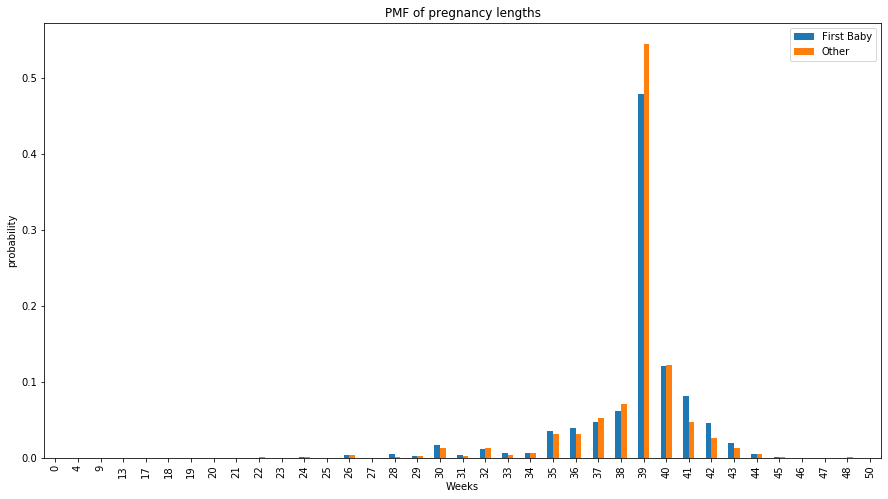

In [45]:
pmf_df.plot(x = 'preglength', y = ['pmf_first_baby','pmf_other'], kind = 'bar' ,figsize = (15,8),label = ['First Baby', 'Other'])
plt.xlabel('Weeks')
plt.ylabel('probability')
plt.title('PMF of pregnancy lengths')
plt.legend()
plt.show()

In [46]:
pmf_df['pmf_diff'] = (pmf_df['pmf_first_baby'] - pmf_df['pmf_other'])*100.00

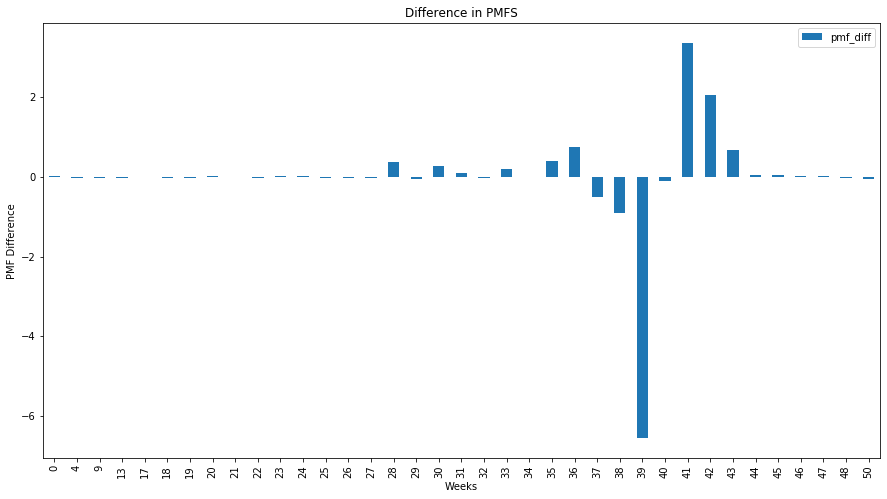

In [47]:
pmf_df.plot(x = 'preglength', y ='pmf_diff' , kind = 'bar' ,figsize = (15,8))
plt.xlabel('Weeks')
plt.ylabel('PMF Difference')
plt.title('Difference in PMFS')
plt.show()

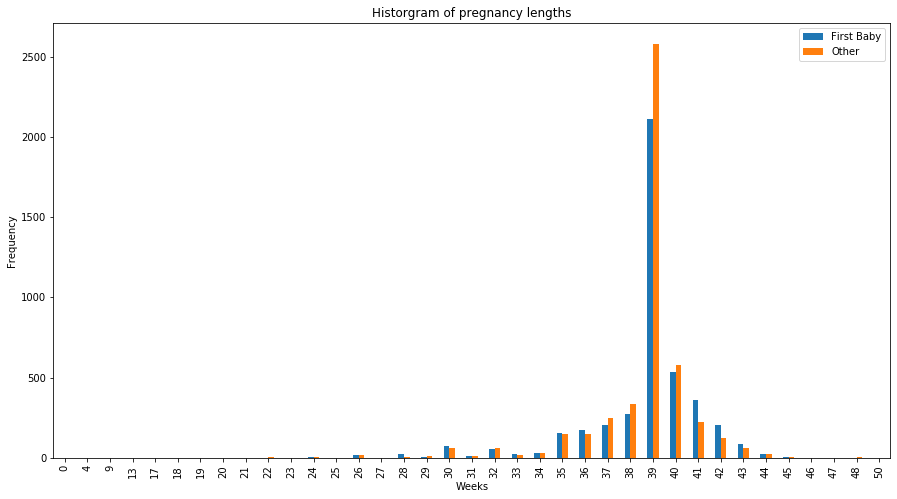

In [48]:
pmf_df.plot(x = 'preglength', y = ['Frequency_first_baby','Frequency_other'], kind = 'bar' ,figsize = (15,8),label = ['First Baby', 'Other'])
plt.xlabel('Weeks')
plt.ylabel('Frequency')
plt.title('Historgram of pregnancy lengths')
plt.legend()
plt.show()

In [49]:
pmf_other.columns = ['PregLength','Frequency','Pmf']
pmf_other.sort_values('PregLength') 
pmf_first_baby.columns = ['PregLength','Frequency','Pmf']
pmf_first_baby.sort_values('PregLength') 

,PregLength,Frequency,Pmf
30,0,1,0.000227
29,17,1,0.000227
28,20,1,0.000227
27,21,1,0.000227
26,22,3,0.000680
25,23,1,0.000227
24,24,7,0.001586
23,25,1,0.000227
22,26,16,0.003626
21,27,1,0.000227


In [50]:
pmf_live_birth = pd.DataFrame(live_briths['prglength'].value_counts().sort_index()).reset_index()

In [51]:
pmf_live_birth.columns = ['PregLength','Frequency']
pmf_live_birth['Pmf'] = pmf_live_birth['Frequency']/pmf_live_birth['Frequency'].sum()

In [52]:
def prob(df,start,end):
    x = df[(df['PregLength']>=start) & (df['PregLength']<=end)]['Pmf'].sum()
    return(x)

prob(pmf_live_birth,0,37)

0.175120244862265

In [53]:
ProbEarly_First_Baby = pmf_first_baby[(pmf_first_baby['PregLength']>=0) & (pmf_first_baby['PregLength']<=37)]['Pmf'].sum()
ProbOnTime_First_Baby = pmf_first_baby[(pmf_first_baby['PregLength']>=38) & (pmf_first_baby['PregLength']<=40)]['Pmf'].sum()
ProbLate_First_Baby = pmf_first_baby[pmf_first_baby['PregLength']>=41]['Pmf'].sum()

first_baby = [ProbEarly_First_Baby,ProbOnTime_First_Baby,ProbLate_First_Baby]

ProbEarly_other = pmf_other[(pmf_other['PregLength']>=0) & (pmf_other['PregLength']<=37)]['Pmf'].sum()
ProbOnTime_other = pmf_other[(pmf_other['PregLength']>=38) & (pmf_other['PregLength']<=40)]['Pmf'].sum()
ProbLate_other = pmf_other[pmf_other['PregLength']>=41]['Pmf'].sum()

Other = [ProbEarly_other,ProbOnTime_other,ProbLate_other]


ProbEarly_live = pmf_live_birth[(pmf_live_birth['PregLength']>=0) & (pmf_live_birth['PregLength']<=37)]['Pmf'].sum()
ProbOnTime_live = pmf_live_birth[(pmf_live_birth['PregLength']>=38) & (pmf_live_birth['PregLength']<=40)]['Pmf'].sum()
ProbLate_live = pmf_live_birth[pmf_live_birth['PregLength']>=41]['Pmf'].sum()

live_birth = [ProbEarly_live,ProbOnTime_live,ProbLate_live]

In [54]:
live_birth

[0.175120244862265, 0.7013554875382597, 0.1235242675994753]

In [55]:
first_baby

[0.18241559030138227, 0.6621346023113529, 0.15544980738726488]

In [56]:
Other

[0.1683210137275607, 0.737909186906019, 0.09376979936642027]

In [57]:
pmf = pd.DataFrame({'Live': live_birth,'Other' : Other,'First': first_baby})

In [58]:
pmf.index = ['Before','Ontime','Late']

In [59]:
pmf.reset_index(inplace = True)


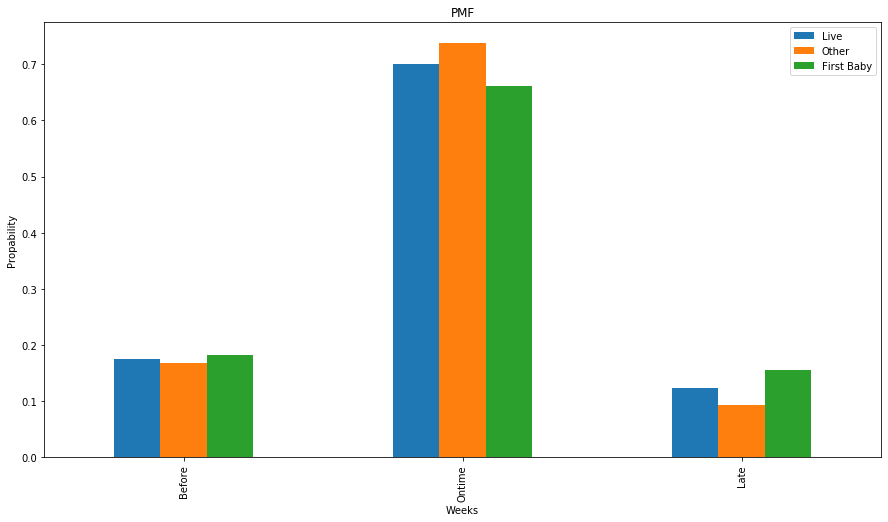

In [60]:
pmf.plot(x = 'index', y = ['Live','Other','First'], kind = 'bar' ,figsize = (15,8),label = ['Live', 'Other','First Baby'])
plt.xlabel('Weeks')
plt.ylabel('Propability')
plt.title('PMF')
plt.legend()
plt.show()

In [61]:
import numpy as np
np.array(first_baby)/np.array(Other)

array([1.08373629, 0.89731178, 1.65778117])

In [62]:
pmf_live_birth

,PregLength,Frequency,Pmf
0,0,1,0.000109
1,4,1,0.000109
2,9,1,0.000109
3,13,1,0.000109
4,17,2,0.000219
5,18,1,0.000109
6,19,1,0.000109
7,20,1,0.000109
8,21,2,0.000219
9,22,7,0.000765


# Exercise 2.7

In [78]:
import numpy as np
def condion_prob(pmf,cond,x):
    pmf = pmf[pmf['PregLength'] >=cond]
    pmf['Pmf'] = pmf['Pmf']/pmf['Pmf'].sum()
    if len(list(pmf[pmf['PregLength'] == x]['Pmf'])) == 0:
        return np.nan
    else:
        return list(pmf[pmf['PregLength'] == x]['Pmf'])[0]

In [79]:
print('probability of baby being born in week 39 = ' + str(condion_prob(pmf_live_birth,39,39)))
print('probability of first baby being born in week 39 = ' + str(condion_prob(pmf_first_baby,39,39)))
print('probability of other baby being born in week 39 = ' + str(condion_prob(pmf_other,39,39)))

probability of baby being born in week 39 = 0.6763222366335208
probability of first baby being born in week 39 = 0.6336930455635492
probability of other baby being born in week 39 = 0.7157923952262004


C:\Users\debas\Anaconda4\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [80]:
print('probability of baby being born in week 42 = ' + str(condion_prob(pmf_live_birth,42,42)))
print('probability of first baby being born in week 42 = ' + str(condion_prob(pmf_first_baby,42,42)))
print('probability of other baby being born in week 42 = ' + str(condion_prob(pmf_other,42,42)))

probability of baby being born in week 42 = 0.6040515653775322
probability of first baby being born in week 42 = 0.6288343558282208
probability of other baby being born in week 42 = 0.566820276497696


C:\Users\debas\Anaconda4\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [81]:
first_birth_prob = []
other_birth_prob = []
for x in range(0, 49):
    first_birth_prob.append(condion_prob(pmf_first_baby, x,x+1))
    other_birth_prob.append(condion_prob(pmf_other, x,x+1))

C:\Users\debas\Anaconda4\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [82]:
df = pd.DataFrame({'First Baby' : first_birth_prob, 'Other' : other_birth_prob} )

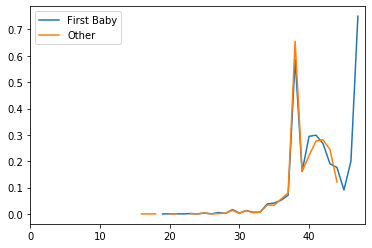

In [83]:
df.plot(kind = 'line')